In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import sys
from matplotlib import pyplot as plt 

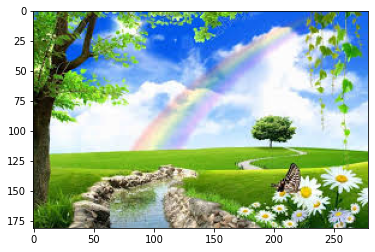

In [ ]:
image = Image.open("scene4.jpg")
plt.imshow(image)

**Encryption Process**

# **Creating Component images**

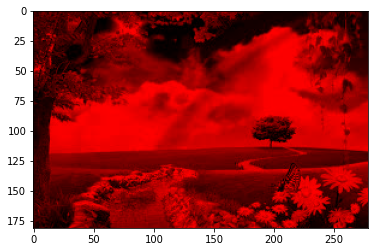

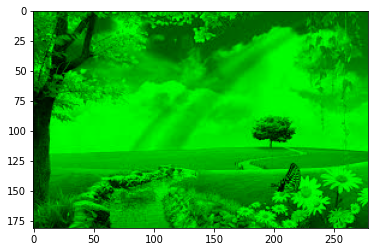

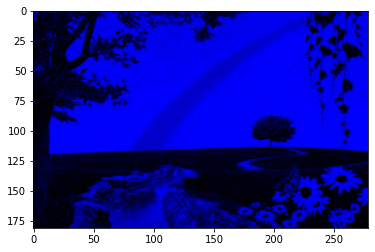

In [ ]:
# converting image into component images (RGB)
comp_img_red = Image.new("RGB", [dimension for dimension in image.size])
comp_img_blue = Image.new("RGB", [dimension for dimension in image.size])
comp_img_green = Image.new("RGB", [dimension for dimension in image.size])
for x in range(0, image.size[0], 1):
    for y in range(0, image.size[1], 1):
        sourcepixel = image.getpixel((x, y))
        comp_img_red.putpixel((x, y),(sourcepixel[0],0,0,0))
        comp_img_green.putpixel((x, y),(0,sourcepixel[1],0,0))
        comp_img_blue.putpixel((x, y),(0,0,sourcepixel[2],0))
comp_img_red.save('comp_red.jpg')
comp_img_green.save('comp_green.jpg')
comp_img_blue.save('comp_blue.jpg')

plt.imshow(comp_img_red)
plt.show()
plt.imshow(comp_img_green)
plt.show()
plt.imshow(comp_img_blue)
plt.show()

# **RSA ENCRYPTION of component images**

In [ ]:
#functions related to RSA: key generation,encryption,decryption
def power1(x,y,m):
	ans=1
	while(y>0):
		if(y%2==1):
			ans=(ans*x)%m
		y=y//2
		x=(x*x)%m
	return ans

def RSA_key_gen():
  row1 = 1000003
  phi = [0 for x1 in range(row1)]
  occ = [0 for x1 in range(row1)]
  primes = [] 
  phi[1] = 1
  for i in range(2,1000001):
    if(phi[i] == 0):
      phi[i] = i-1
      primes.append(i)
      for j in range (2*i,1000001,i):
        if(occ[j] == 0):
          occ[j] = 1
          phi[j] = j
        phi[j] = (phi[j]*(i-1))//i
  p = primes[random.randrange(1,167)]
  q = primes[random.randrange(1,167)]
  n = p*q
  mod = n
  phin1 = phi[n]
  phin2 = phi[phin1]
  e = primes[random.randrange(1,9000)]
  mod1 = phin1
  d = power1(e,phin2-1,mod1)
  return (e,d,mod)

def RSA_encrypt(jpgfile,e,mod):
  row,col = jpgfile.size
  pixels = jpgfile.load()
  enc = [[0 for x in range(row)] for y in range(col)]
  for i in range(col):
    for j in range(row):
      r,g,b = pixels[j,i]
      r1 = power1(r+10,e,mod)
      g1 = power1(g+10,e,mod)
      b1 = power1(b+10,e,mod)
      enc[i][j] = [r1,g1,b1]
  img = np.array(enc,dtype = np.uint8)
  img1 = Image.fromarray(img,"RGB")
  img1.show()
  return (img1,row,col,enc)

def RSA_decrypt(row,col,enc,d,mod):
  dec = [[0 for x in range(row)] for y in range(col)]
  for i in range(col):
    for j in range(row):
      r,g,b = enc[i][j]
      r1 = power1(r,d,mod)-10
      g1 = power1(g,d,mod)-10
      b1 = power1(b,d,mod)-10
      dec[i][j] = [r1,g1,b1]
  img2 = np.array(dec,dtype = np.uint8)
  img3 = Image.fromarray(img2,"RGB")
  img3.show()
  return(img3)

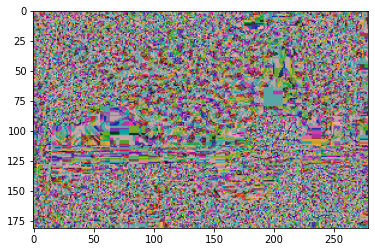

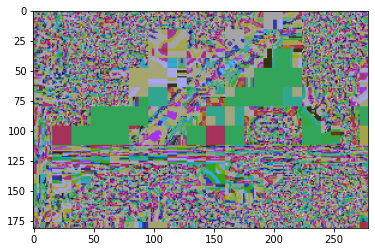

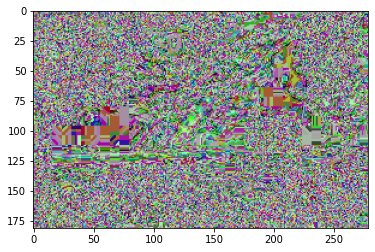

In [ ]:
#RSA key generation
e,d,mod=RSA_key_gen()
#print(e,d,mod)

#Encrypting Component images using RSA
jpgfile1 = Image.open("comp_red.jpg")
enc_image_red,row1,col1,enc1=RSA_encrypt(jpgfile1,e,mod)
jpgfile2 = Image.open("comp_green.jpg")
enc_image_green,row2,col2,enc2=RSA_encrypt(jpgfile2,e,mod)
jpgfile3 = Image.open("comp_blue.jpg")
enc_image_blue,row3,col3,enc3=RSA_encrypt(jpgfile3,e,mod)

enc_image_red.save('enc_image_red.jpg')
enc_image_green.save('enc_image_green.jpg')
enc_image_blue.save('enc_image_blue.jpg')

plt.imshow(enc_image_red)
plt.show()
plt.imshow(enc_image_blue)
plt.show()
plt.imshow(enc_image_green)
plt.show()

#dec_image_red=RSA_decrypt(row1,col1,enc1,d,mod)
#dec_image_green=RSA_decrypt(row2,col2,enc2,d,mod)
#dec_image_blue=RSA_decrypt(row1,col1,enc3,d,mod)


# **Dividing RGB encrypted images into A-share and B-share**

In [ ]:
#Dividing the shares to A and B

image1 = enc_image_red
red_share_a = Image.new("RGB", [dimension * 2 for dimension in image1.size])
red_share_b = Image.new("RGB", [dimension * 2 for dimension in image1.size])
image2 = enc_image_green
green_share_a = Image.new("RGB", [dimension * 2 for dimension in image2.size])
green_share_b = Image.new("RGB", [dimension * 2 for dimension in image2.size])
image3 = enc_image_blue
blue_share_a = Image.new("RGB", [dimension * 2 for dimension in image3.size])
blue_share_b = Image.new("RGB", [dimension * 2 for dimension in image3.size])
for x in range(0, image1.size[0]):
    for y in range(0, image1.size[1]):
        pixel = image1.getpixel((x, y))
        if pixel[1]+pixel[2] >=300:
            red_share_a.putpixel((x * 2, y * 2), (pixel[0],0,0))
            red_share_a.putpixel((x * 2 + 1, y * 2), (0,pixel[1],pixel[2]))
            red_share_a.putpixel((x * 2, y * 2 + 1), (0,pixel[1],pixel[2]))
            red_share_a.putpixel((x * 2 + 1, y * 2 + 1), (pixel[0],0,0))
        else:
            red_share_b.putpixel((x * 2, y * 2), (0,pixel[1],pixel[2]))
            red_share_b.putpixel((x * 2 + 1, y * 2), (pixel[0],0,0))
            red_share_b.putpixel((x * 2, y * 2 + 1), (pixel[0],0,0))
            red_share_b.putpixel((x * 2 + 1, y * 2 + 1), (0,pixel[1],pixel[2]))
red_share_a.save('red_share_a.jpg')
red_share_b.save('red_share_b.jpg')       
for x in range(0, image2.size[0]):
    for y in range(0, image2.size[1]): 
        pixel = image2.getpixel((x, y))
        if pixel[1]+pixel[2] >=300:
            green_share_a.putpixel((x * 2, y * 2), (0,pixel[1],0))
            green_share_a.putpixel((x * 2 + 1, y * 2), (pixel[0],0,pixel[2]))
            green_share_a.putpixel((x * 2, y * 2 + 1), (pixel[0],0,pixel[2]))
            green_share_a.putpixel((x * 2 + 1, y * 2 + 1), (0,pixel[1],0))
        else:
            green_share_b.putpixel((x * 2, y * 2), (pixel[0],0,pixel[2]))
            green_share_b.putpixel((x * 2 + 1, y * 2), (0,pixel[1],0))
            green_share_b.putpixel((x * 2, y * 2 + 1), (0,pixel[1],0))
            green_share_b.putpixel((x * 2 + 1, y * 2 + 1), (pixel[0],0,pixel[2]))
green_share_a.save('green_share_a.jpg')
green_share_b.save('green_share_b.jpg') 
for x in range(0, image3.size[0]):
    for y in range(0, image3.size[1]):
        pixel = image3.getpixel((x, y))
        if pixel[1]+pixel[2] >=300:
            blue_share_a.putpixel((x * 2, y * 2), (0,0,pixel[2]))
            blue_share_a.putpixel((x * 2 + 1, y * 2), (pixel[0],pixel[1],0))
            blue_share_a.putpixel((x * 2, y * 2 + 1), (pixel[0],pixel[1],0))
            blue_share_a.putpixel((x * 2 + 1, y * 2 + 1), (0,0,pixel[2]))
        else:
            blue_share_b.putpixel((x * 2, y * 2), (pixel[0],pixel[1],0))
            blue_share_b.putpixel((x * 2 + 1, y * 2), (0,0,pixel[2]))
            blue_share_b.putpixel((x * 2, y * 2 + 1), (0,0,pixel[2]))
            blue_share_b.putpixel((x * 2 + 1, y * 2 + 1), (pixel[0],pixel[1],0))
blue_share_a.save('blue_share_a.jpg')
blue_share_b.save('blue_share_b.jpg') 


# **Combined Share-A and Share-B**

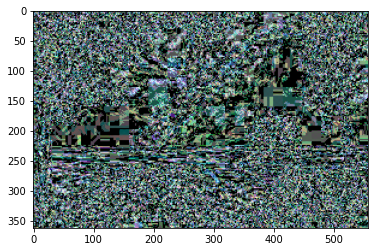

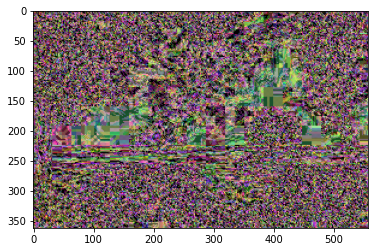

In [ ]:
#combining A and B shares to get the final encrypted two shares - share A and share B

share_a = Image.new("RGB", [dimension * 2 for dimension in image3.size])
share_b = Image.new("RGB", [dimension * 2 for dimension in image3.size])

for x in range(0, blue_share_a.size[0]):
    for y in range(0, blue_share_a.size[1]):
        r_pixela = red_share_a.getpixel((x, y))
        r_pixelb = red_share_b.getpixel((x, y))
        g_pixela = green_share_a.getpixel((x, y))
        g_pixelb = green_share_b.getpixel((x, y))
        b_pixela = blue_share_a.getpixel((x, y))
        b_pixelb = blue_share_b.getpixel((x, y))
        share_a.putpixel((x, y), (r_pixela[0]+g_pixela[0]+b_pixela[0],r_pixela[1]+g_pixela[1]+b_pixela[1],r_pixela[2]+g_pixela[2]+b_pixela[2]))
        share_b.putpixel((x, y), (r_pixelb[0]+g_pixelb[0]+b_pixelb[0],r_pixelb[1]+g_pixelb[1]+b_pixelb[1],r_pixelb[2]+g_pixelb[2]+b_pixelb[2]))
share_a.save('share_a.jpg')
share_b.save('share_b.jpg') 

plt.imshow(share_a)
plt.show()    
plt.imshow(share_b)
plt.show()    

**Decryption Process**

# **Combining Share images**

RED SHARE


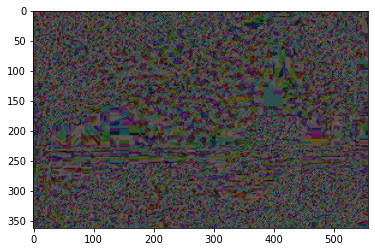

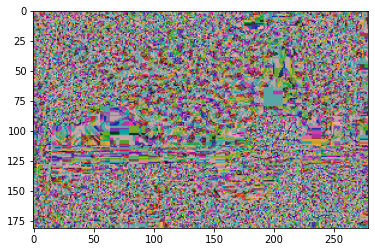

GREEN SHARE


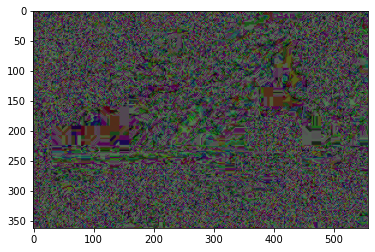

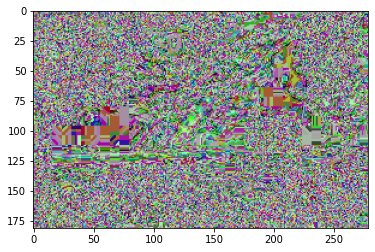

BLUE SHARE


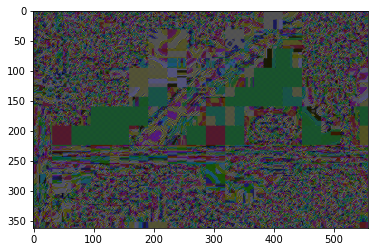

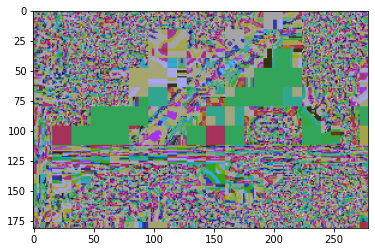

In [ ]:
red_share_dec = Image.new("RGB", [dimension * 2 for dimension in image3.size])
r=[]
for x in range(0, red_share_a.size[0]):
    r1=[]
    for y in range(0, red_share_a.size[1]):
        pixel1 = red_share_a.getpixel((x, y))
        pixel2 = red_share_b.getpixel((x, y))
        red_share_dec.putpixel((x, y), (pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]))
        r1.append([pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]])
    r.append(r1)
print('RED SHARE')
plt.imshow(red_share_dec)
plt.show()
plt.imshow(enc_image_red)
plt.show()
red_share_dec.save('combine_share_red.jpg')

green_share_dec = Image.new("RGB", [dimension * 2 for dimension in image3.size])
g=[]
for x in range(0, green_share_a.size[0]):
    g1=[]
    for y in range(0, green_share_a.size[1]):
        pixel1 = green_share_a.getpixel((x, y))
        pixel2 = green_share_b.getpixel((x, y))
        green_share_dec.putpixel((x, y), (pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]))
        g1.append([pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]])
    g.append(g1)
print('GREEN SHARE')
plt.imshow(green_share_dec)
plt.show()
plt.imshow(enc_image_green)
plt.show()
green_share_dec.save('combine_share_green.jpg')

blue_share_dec = Image.new("RGB", [dimension * 2 for dimension in image3.size])
b=[]
for x in range(0, blue_share_a.size[0]):
    b1=[]
    for y in range(0, blue_share_a.size[1]):
        pixel1 = blue_share_a.getpixel((x, y))
        pixel2 = blue_share_b.getpixel((x, y))
        blue_share_dec.putpixel((x, y), (pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]))
        b1.append([pixel1[0]+pixel2[0],pixel1[1]+pixel2[1],pixel1[2]+pixel2[2]])
    b.append(b1)
print('BLUE SHARE')
plt.imshow(blue_share_dec)
plt.show()
plt.imshow(enc_image_blue)
plt.show()
blue_share_dec.save('combine_share_blue.jpg')

# **RSA decryption**

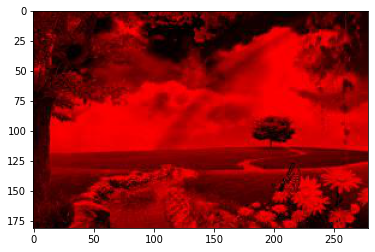

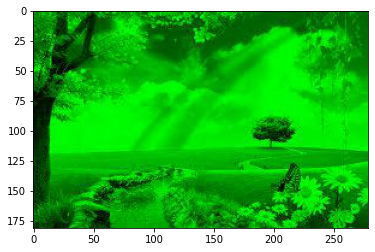

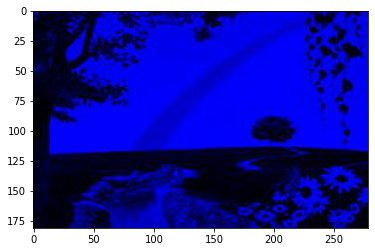

In [ ]:
dec_image_red=RSA_decrypt(row1,col1,enc1,d,mod)
plt.imshow(dec_image_red)
plt.show()
dec_image_red.save('dec_image_red.jpg')

dec_image_green=RSA_decrypt(row2,col2,enc2,d,mod)
plt.imshow(dec_image_green)
plt.show()
dec_image_green.save('dec_image_green.jpg')

dec_image_blue=RSA_decrypt(row1,col1,enc3,d,mod)
plt.imshow(dec_image_blue)
plt.show()
dec_image_blue.save('dec_image_blue.jpg')


# **Combining Component images**

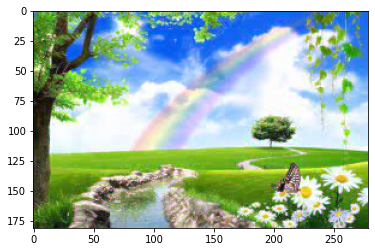

In [ ]:
final_img = Image.new("RGB", [dimension for dimension in image.size])
for x in range(0, image.size[0], 1):
    for y in range(0, image.size[1], 1):
        pixel_r = dec_image_red.getpixel((x, y))
        pixel_g = dec_image_green.getpixel((x, y))
        pixel_b = dec_image_blue.getpixel((x, y))
        final_img.putpixel((x, y),(pixel_r[0]+pixel_g[0]+pixel_b[0],pixel_r[1]+pixel_g[1]+pixel_b[1],pixel_r[2]+pixel_g[2]+pixel_b[2]))
final_img.save('final_img.jpg')

plt.imshow(final_img)
plt.show()